In [1]:
import pandas as pd
import matplotlib.pyplot as plt

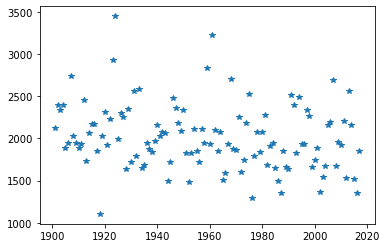

In [4]:
import numpy as np
x=pd.read_csv("C:\\Users\\KAUSHIK\\Downloads\\Minor_Project-main\\States\\kerala.csv")
y=pd.read_csv("C:\\Users\\KAUSHIK\\Downloads\\Minor_Project-main\\States\\kerala.csv")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'*')
plt.show()

In [5]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')

#print(len(x1))

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2017
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2017
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))


df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      




    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0        Kerala  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1        Kerala  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2        Kerala  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3        Kerala  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4        Kerala  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
112      Kerala  2013   3.9  40.1  49.9   49.3  119.3  1042.7   830.2  369.7   
113      Kerala  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8  733.9   
114      Kerala  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0  252.2   
115      Kerala  2016   3.0  16.4  22.4   33.3  258.4   595.7   441.5  231.0   
116      Kerala  2017  12.7   0.3  87.8   52.8  213.3   579.8   378.5  462.6   

     ...    NOV    DEC  ANNUAL  Jan-Feb

In [6]:
import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:


#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING

X = x.iloc[:,[16,20,21]].values
y1=x.iloc[:,19].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


#X1= scale(X)
#print(X1)

Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X,y1))  # PRINTS THE ACCURACY
#ypred=Lr.score(X_test,Y_test)
#print(ypred)






0.8632478632478633


In [8]:

l=[[50,300,205]]

#print(X)

#ypred=Lr.predict(X)
f1=Lr.predict(l)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")
    
    

0 - no chance of severe flood
